# Import Modules

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Download NLTK resources (uncomment if not already downloaded)
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\otto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\otto\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Load the data set

In [2]:
rating_df = pd.read_csv("../data/rating.csv")
domains_location_df = pd.read_csv("../data/domains_location.csv")
traffic_data_df = pd.read_csv("../data/traffic.csv")

In [3]:
rating_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [43]:
country = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad",
    "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech", "Democratic Republic of the Congo", "Denmark", "Djibouti",
    "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany",
    "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hong Kong", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho",
    "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives",
    "Mali", "Malta", "Marshall Islands", "Martinique", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia",
    "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands",
    "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden",
    "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga",
    "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates",
    "United Kingdom","UK", "United States of America","USA","United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [59]:
# Mapping the categories to broader categories
mapping = {
    'Breaking News': [
        'COVID', 'News', 'Breaking News', 'nan'  # General breaking news items
    ],
    'Politics': [
        'Politics', 'Palestine, State of', 'United States', 'Taiwan, Province of China', 
        'Uruguay', 'Virgin Islands, U.S.', 'Viet Nam', 'Korea, Republic of',
        'Russian Federation', 'Iran, Islamic Republic of'
    ],
    'World News': [
        'world', 'country', 'Congo, The Democratic Republic of the', 'America', 
        'Africa', 'Europe', 'Asia', 'Guam', 'Aruba', 'Guernsey', 'Antarctica',
        'Bermuda', "Côte d'Ivoire", 'Christmas Island', 'Cayman Islands', 
        'Gibraltar', 'Greenland', 'Isle of Man', 'Jersey', 'Macao', 'Réunion', 
        'Montserrat', 'Puerto Rico', 'Martinique'
    ],
    'Business/Finance': [
        'Business/Finance', 'Real estate', 'Stock', 'Startups', 'Finance', 'Entrepreneurship',
        'Cryptocurrency', 'Blockchain', 'Bitcoin', 'Amazon', 'Jobs'
    ],
    'Technology': [
        'Technology', 'Artificial Intelligence', 'Google', 'YouTube', 'Facebook', 
        'TikTok', 'Instagram', 'Virtual Reality', 'Coding', 'Design'
    ],
    'Science': [
        'Science', 'Space', 'Astronomy'
    ],
    'Food' : ['Food'],
    'Health': [
        'Health', 'Fitness', 'Nutrition', 'Vegan', 'Mindfulness', 'Meditation',
        'Yoga', 'Happiness', 'Philosophy', 'Psychology', 'Parenting', 'Motivation'
    ],
    'Entertainment': [
        'Entertainment', 'Movies', 'Music', 'Anime', 'Podcasts', 'Poetry', 
        'Games', 'Art', 'Photography', 'Beauty', 'Fashion', 'Love'
    ],
    'Sports': [
        'Sports', 'Hiking', 'Cars'
    ],
    'Environment': [
        'Environment', 'Climate', 'Gardening', 'Sustainability'
    ],
    'Crime': [
        # Since no explicit categories fit into 'Crime', we leave it empty for now.
    ],
    'Education': [
        'Education', 'History', 'Home', 'Recipes', 'DIY'
    ],
    'Weather': [
        'Weather'
    ],
    'Other': [
        'Other', 'Architecture', 'Minimalism', 'Productivity', 'Travel', 'Mindfulness', 
        'Christmas Island', 'Isle of Man', 'Guam', 'Aruba', 'Guernsey', 'Antarctica',
        'Bermuda', 'Côte d\'Ivoire', 'Christmas Island', 'Cayman Islands', 
        'Gibraltar', 'Greenland', 'Jersey', 'Macao', 'Réunion', 'Relationships', 'Pets'
    ]
}


In [60]:
def categ(x):
    x = str(x)
    cntry = [i.lower() for i in country]
    if x.lower() in cntry:
        x =  'country'

    for i in mapping.keys():
        if x in mapping[i]:
            return i
    return f'none yet - {x}'

In [5]:
import Preprocess

In [6]:
dir (Preprocess)

['Preprocess',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

## Classification of Headlines

In [7]:
from Preprocess.Preprocess import  create_tags

In [9]:
rating_df['tags'] = rating_df['category'].apply(create_tags)

In [11]:
rating_df.head(2)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,tags
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,World News
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,World News


#### Approach 1 Regression with TFIDF

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Define custom stop words list
custom_stop_words = set(stopwords.words('english'))
#  Function to preprocess text
def preprocess_text_lemmatize(text):
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    # Initialize WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Define custom stop words list
    custom_stop_words = set(stopwords.words('english'))
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [30]:
# Function to preprocess text using stemming
def preprocess_text_stemming(text):
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.stem import WordNetLemmatizer
    from nltk.stem import PorterStemmer

    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in custom_stop_words]
    
    # Initialize Porter Stemmer
    stemmer = PorterStemmer()
    # Stem tokens
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

#### for 1 
- get the text and tags to a new df
- encode tags
- split to train, test 
- method 1 
- - tdidf fit and save
- - fit on train
- - transform with tidf
- - predict on text
- - evaluate

- Method 2

In [27]:
df =   rating_df[['url','published_at', 'title','article','tags']]

In [32]:
# nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\otto\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [34]:
df.loc[:,'title_clean'] = df['title'].apply(preprocess_text_lemmatize)

In [35]:
df.loc[:,'article_clean'] = df['article'].apply(preprocess_text_stemming)

C:\Users\otto\AppData\Local\Temp\ipykernel_4032\1571461915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'article_clean'] = df['article'].apply(preprocess_text_stemming)


In [39]:
df.head(1)

,title,article,tags,title_clean,article_clean,text
0,superstar chef yannick alléno brings refined f...,"pavyllon london, at four seasons hotel london ...",World News,superstar chef yannick alléno brings refined f...,pavyllon london four season hotel london park ...,superstar chef yannick alléno brings refined f...


In [38]:
df.loc[:,'text'] = df['title_clean'] + " " + df['article_clean']

C:\Users\otto\AppData\Local\Temp\ipykernel_4032\1113171239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'text'] = df['title_clean'] + " " + df['article_clean']


In [50]:
df.tags

0        World News
1        World News
2        World News
3        World News
4        World News
            ...    
58351     Education
58352     Education
58353     Education
58354     Education
58355     Education
Name: tags, Length: 58356, dtype: object

In [78]:
OHEencoder = OneHotEncoder(sparse_output=False)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['tags'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],y_encoded, test_size=0.2, random_state=42)



In [42]:
# rating_df

In [79]:
# Initialize TF-IDF Vector
# Fit the TF-IDF vectorizer on the entire corpus
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectorizer.fit(df['text'])


TfidfVectorizer(max_features=5000, stop_words='english')

In [80]:
# Transform the training and test data separately
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)




#### Logistic Regression

In [45]:
# # Proceed with model training as usual
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

#### RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(n_estimators=20, random_state=42)

In [82]:
# Make predictions on the test set
# y_pred_ohe = model.predict(X_test_tfidf)
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

In [72]:
# y_pred_ohe[432]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [84]:
# y_pred = OHEencoder.inverse_transform(y_pred_ohe)

In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 57.24%
              precision    recall  f1-score   support

           0       0.58      0.21      0.31       524
           1       0.79      0.44      0.57      1959
           2       0.63      0.27      0.38       482
           3       0.56      0.42      0.48       642
           4       0.46      0.25      0.33       241
           5       0.44      0.30      0.36       231
           6       0.58      0.51      0.55       597
           7       0.63      0.33      0.43       447
           8       0.61      0.16      0.26       231
           9       0.52      0.26      0.35       287
          10       0.60      0.40      0.48       294
          11       0.60      0.38      0.47       990
          12       0.56      0.75      0.64       202
          13       0.54      0.87      0.67      4545

    accuracy                           0.57     11672
   macro avg       0.58      0.40      0.45     11672
weighted avg       0.60      0.57      0.55     11672



## To do's left
- train with multiple models and try out OHE
- Bert Mode

#### BERT MODEL

## Keyword Extraction - Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### Term Frequency - Inverse Document Frequency

In [89]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.85, max_features=10000)

# Fit and transform the text
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Extract feature names (keywords)
feature_names = vectorizer.get_feature_names_out()

In [90]:

# Sort and get top keywords for each document
def get_top_keywords(tfidf_matrix, feature_names, top_n=10):
    top_keywords = []
    for row in tfidf_matrix:
        indices = row.indices
        data = row.data
        sorted_indices = indices[data.argsort()[::-1]]
        top_keywords.append([feature_names[i] for i in sorted_indices[:top_n]])
    return top_keywords


In [91]:
top_keywords = get_top_keywords(tfidf_matrix, feature_names)
df['tfidf_keywords'] = top_keywords


C:\Users\otto\AppData\Local\Temp\ipykernel_4032\1144806572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tfidf_keywords'] = top_keywords


In [100]:
df.sample(3)

,title,article,tags,title_clean,article_clean,text,tags_encoded,tfidf_keywords
27741,"Align Technology, Inc. (NASDAQ:ALGN) Shares So...",Glassman Wealth Services reduced its holdings ...,Technology,align technology nasdaq algn share sold glassm...,glassman wealth servic reduc hold share align ...,align technology nasdaq algn share sold glassm...,11,"[align, share, technolog, stock, valu, own, ra..."
19805,Direxion Work From Home ETF (NYSEARCA:WFH) Sha...,Direxion Work From Home ETF (NYSEARCA:WFH–Get ...,Technology,direxion work home etf nysearca wfh share,direxion work home etf nysearca free report sh...,direxion work home etf nysearca wfh share dire...,11,"[etf, stock, share, work, home, quarter, vonto..."
3853,delhi air quality: hc informed about supreme c...,the delhi high court was on thursday informed ...,Breaking News,delhi air quality hc informed supreme court di...,delhi high court thursday inform suprem court ...,delhi air quality hc informed supreme court di...,0,"[delhi, air, court, haryana, justic, punjab, b..."


In [105]:
import joblib

# Save the TF-IDF Vectorizer
joblib.dump(vectorizer, '../Models/keyword_extractor_tfidf_vectorizer.joblib')


['../Models/keyword_extractor_tfidf_vectorizer.joblib']

#### Yake Keywords


In [102]:
from yake import KeywordExtractor

# Initialize YAKE with desired parameters
extractor = KeywordExtractor(lan="en", n=1, dedupLim=0.7, top=10, features=None)

# Function to extract keywords from a single document
def extract_yake_keywords(text):
    keywords = extractor.extract_keywords(text)
    return [kw[0] for kw in keywords]

# Apply YAKE to each document
df['yake_keywords'] = df['text'].apply(extract_yake_keywords)


C:\Users\otto\AppData\Local\Temp\ipykernel_4032\1256992485.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yake_keywords'] = df['text'].apply(extract_yake_keywords)


In [103]:
# df['url'] = rating_df['url']
# df['published_at']  = rating_df['published_at']

C:\Users\otto\AppData\Local\Temp\ipykernel_4032\3101597430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['url'] = rating_df['url']
C:\Users\otto\AppData\Local\Temp\ipykernel_4032\3101597430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at']  = rating_df['published_at']


In [106]:
import json

# Save YAKE parameters (optional)
yake_params = {'lan': 'en', 'n': 1, 'dedupLim': 0.7, 'top': 10, 'features': None}
with open('../Models/yake_params.json', 'w') as f:
    json.dump(yake_params, f)


In [104]:
df.sample(3)

,title,article,tags,title_clean,article_clean,text,tags_encoded,tfidf_keywords,yake_keywords,url,published_at
13088,iceland seafood international hf: results of b...,iceland seafood intenational hf held a bondhol...,World News,iceland seafood international hf result bondho...,iceland seafood inten hf held bondhold meet ho...,iceland seafood international hf result bondho...,13,"[hf, seafood, iceland, amend, bond, attach, wa...","[iceland, seafood, term, condit, bondhold, mee...",https://www.marketscreener.com/quote/stock/ICE...,2023-10-25 12:28:01.000000
34949,"Rock Creek Group LP Has $113,000 Stake in Mond...",Rock Creek Group LP decreased its holdings in ...,World News,rock creek group lp stake mondelez internation...,rock creek group lp decreas hold share mondele...,rock creek group lp stake mondelez internation...,13,"[mondelez, intern, snack, quarter, stock, shar...","[mondelez, intern, share, report, quarter, sto...",https://www.etfdailynews.com/2023/11/13/rock-c...,2023-11-13 13:34:51
26894,7.1-magnitude quake hits Indonesia’s Banda Sea,A 7.1-magnitude earthquake struck Indonesia’s ...,World News,quake hit indonesia banda sea,earthquak struck indonesia banda sea wednesday...,quake hit indonesia banda sea earthquak struck...,13,"[quak, earthquak, tsunami, kill, indonesian, p...","[kill, earthquak, quak, java, tsunami, pacif, ...",https://punchng.com/7-1-magnitude-quake-hits-i...,2023-11-08 08:15:09


## TO do's left
- ideas
- have an essemble of the keyworfds from tdidf and yake
- use the combination to predict tags

### Topic Modelling

#### LDA - latency Dirichilet

In [107]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [109]:
# Initialize TF-IDF vectorizer with preprocessed text
tfidf_vectorizer_lda = TfidfVectorizer(max_features =1000, max_df = 0.7, min_df =2)

In [111]:
# Fit and transform preprocessed text data to compute TF-IDF scores
tfidf_matrix_lda = tfidf_vectorizer_lda.fit_transform(df['text'])

In [120]:
# Initialize LDA
lda_model = LatentDirichletAllocation(n_components=20, random_state=42)

# Fit LDA model to TF-IDF matrix
lda_model.fit(tfidf_matrix_lda)

LatentDirichletAllocation(n_components=20, random_state=42)

In [121]:
# Get the topics and their top words
topics = lda_model.components_
feature_names_lda = tfidf_vectorizer_lda.get_feature_names_out()
n_top_words = 5  # Number of top words for each topic

In [122]:

# Get the topics
def display_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

lda_topics = display_topics(lda_model, tfidf_vectorizer_lda.get_feature_names_out(), 10)
lda_topics


[['said',
  'peopl',
  'say',
  'work',
  'like',
  'one',
  'go',
  'time',
  'would',
  'year'],
 ['music',
  'de',
  'star',
  'bodi',
  'children',
  'place',
  'work',
  'man',
  'book',
  'new'],
 ['statement',
  'compani',
  'inform',
  'result',
  'financi',
  'secur',
  'million',
  'oper',
  'may',
  'includ'],
 ['ukrain',
  'russia',
  'russian',
  'china',
  'said',
  'countri',
  'militari',
  'chines',
  'minist',
  'eu'],
 ['gaza',
  'israel',
  'isra',
  'palestinian',
  'hama',
  'said',
  'attack',
  'war',
  'kill',
  'humanitarian'],
 ['googl',
  'appl',
  'use',
  'featur',
  'deal',
  'amazon',
  'user',
  'like',
  'black',
  'phone'],
 ['stock',
  'ratio',
  'averag',
  'trade',
  'share',
  'compani',
  'report',
  'free',
  'move',
  'price'],
 ['stock',
  'compani',
  'compar',
  'earn',
  'indic',
  'share',
  'servic',
  'institut',
  'upsid',
  'free'],
 ['stock',
  'share',
  'quarter',
  'compani',
  'own',
  'rate',
  'transact',
  'price',
  'valu',
  

In [123]:
article_topics = lda_model.transform(tfidf_matrix_lda)

In [124]:
df['lda_topics_n'] = article_topics.argmax(axis=1)

C:\Users\otto\AppData\Local\Temp\ipykernel_4032\2806691980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lda_topics_n'] = article_topics.argmax(axis=1)


In [128]:
df.loc[:,'lda_topics'] = df['lda_topics_n'].apply(lambda x: ', '.join(lda_topics[x]))

In [129]:
df[['title', 'lda_topics']]

,title,lda_topics
0,superstar chef yannick alléno brings refined f...,"film, cup, game, world, team, match, play, win..."
1,nice claim top spot in ligue 1 with late win a...,"film, cup, game, world, team, match, play, win..."
2,amphibians are the world’s most vulnerable spe...,"climat, studi, said, research, water, use, sci..."
3,image: rusty red waters in madagascar,"climat, studi, said, research, water, use, sci..."
4,everything leaving max (formerly hbo max) in n...,"film, cup, game, world, team, match, play, win..."
...,...,...
58351,"Have done no wrong, only did party work, says ...","said, polic, court, arrest, investig, case, go..."
58352,FC Barcelona Guarantees $77.6 Million Champion...,"film, cup, game, world, team, match, play, win..."
58353,Three hospitals ignored her gravely ill fiancé...,"said, peopl, say, work, like, one, go, time, w..."
58354,Kerber’s Farm: Bringing Farm To Table To Manha...,"said, peopl, say, work, like, one, go, time, w..."


#### Save tfidf LDA model

In [130]:
# import joblib

# Save the LDA model
joblib.dump(lda, '../Models/lda_model.joblib')

# Save the CountVectorizer used for LDA
joblib.dump(tfidf_vectorizer_lda, '../Models/lda_tfidf_vectorizer.joblib')


['../Models/lda_tfidf_vectorizer.joblib']

#### LSI Model

In [131]:
import gensim
from gensim import corpora
from gensim.models import LsiModel

In [ ]:
# import joblib

# def LDA_Model_loader(path):
# # Load the LDA model
# lda = joblib.load('lda_model.joblib')

# # Load the CountVectorizer
# count_vectorizer = joblib.load('lda_count_vectorizer.joblib')

# # Transform new data
# new_text = ["Your new document text here"]
# new_count_data = count_vectorizer.transform(new_text)

# # Predict topics for the new data
# lda_predictions = lda.transform(new_count_data)


In [155]:


# Preprocess the text for gensim
processed_texts = [gensim.utils.simple_preprocess(doc) for doc in (df['text']) ]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_texts)

# Convert to bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Initialize LSI model
lsi = LsiModel(corpus, id2word=dictionary, num_topics=20)




In [156]:
# Get the topics
lsi_topics = lsi.print_topics(num_words=10)
df.loc[:,'lsi_topics_n'] = [lsi[dictionary.doc2bow(text)] for text in processed_texts]

In [157]:
def _get_lsi_topic(res):
    return lsi_topics[sorted (res, key= lambda x: -x[1] )[0][0] ][1]

In [158]:
df.columns

Index(['title', 'article', 'tags', 'title_clean', 'article_clean', 'text',
       'tags_encoded', 'tfidf_keywords', 'yake_keywords', 'url',
       'published_at', 'lda_topics_n', 'lda_topics', 'lsi_topics',
       'lsi_topics_n'],
      dtype='object')

In [163]:
df.loc[:,'lsi_topics_n'] .apply(_get_lsi_topic).nunique()

18

In [164]:
df.loc[:, 'lsi_topics'] =  df.loc[:,'lsi_topics_n'].apply(_get_lsi_topic)

In [134]:
df[['title', 'lsi_topics']]

,title,lsi_topics
0,superstar chef yannick alléno brings refined f...,"[(0, 0.7027009211635216), (1, 5.33295117624897..."
1,nice claim top spot in ligue 1 with late win a...,"[(0, 0.18108047860877077), (1, 1.2397365877799..."
2,amphibians are the world’s most vulnerable spe...,"[(0, 3.4623018602974653), (1, 4.42295643279153..."
3,image: rusty red waters in madagascar,"[(0, 0.7704904198325423), (1, 3.69583198261703..."
4,everything leaving max (formerly hbo max) in n...,"[(0, 0.30205263776634156), (1, 3.0730879400237..."
...,...,...
58351,"Have done no wrong, only did party work, says ...","[(0, 0.573663280586802), (1, 5.723992196322158..."
58352,FC Barcelona Guarantees $77.6 Million Champion...,"[(0, 0.42435468566117396), (1, 3.9171217580690..."
58353,Three hospitals ignored her gravely ill fiancé...,"[(0, 0.6089403095627431), (1, 6.45920756869940..."
58354,Kerber’s Farm: Bringing Farm To Table To Manha...,"[(0, 1.0073718899591648), (1, 7.59522336296751..."


#### Saving the model

In [165]:
# Save the LSI model
lsi.save('../Models/lsi_model.gensim')

# Save the dictionary used in LSI
dictionary.save('../Models/lsi_dictionary.gensim')


#### NMF model

In [166]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer


In [168]:
# Use TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
# tfidf_data = tfidf_vectorizer.fit_transform(combined_text)
tfidf_vectorizer_nmf = tfidf_vectorizer_lda
tfidf_mattrix_nmf = tfidf_vectorizer_nmf.fit_transform(df['text'])

In [169]:
# Initialize NMF model
nmf = NMF(n_components=20, random_state=42)

# Fit NMF model
nmf.fit(tfidf_mattrix_nmf)

NMF(n_components=20, random_state=42)

In [172]:
# Get the topics
def display_nmf_topics(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
    return topics

nmf_topics = display_nmf_topics(nmf, tfidf_vectorizer_nmf.get_feature_names_out(), 10)
nmf_t= nmf.transform(tfidf_mattrix_nmf)


In [176]:
df['nmf_topic_n'] =  nmf_t.argmax(axis =1)

In [179]:
df['nmf_topic'] = df['nmf_topic_n'].apply(lambda x: ', '.join(nmf_topics[x]))

In [184]:
df[['nmf_topic','lda_topics']].iloc[-1,:]

nmf_topic     trust, estat, real, invest, dividend, properti...
lda_topics    ai, technolog, compani, innov, develop, custom...
Name: 58355, dtype: object

#### Saving NMF

In [186]:
# Save the NMF model
joblib.dump(nmf, '../Models/nmf_model.joblib')

# Save the TF-IDF Vectorizer used for NMF
joblib.dump(tfidf_vectorizer_nmf, '../Models/nmf_tfidf_vectorizer.joblib')


['../Models/nmf_tfidf_vectorizer.joblib']

#### Save df

In [187]:
df.sample(2)

,title,article,tags,title_clean,article_clean,text,tags_encoded,tfidf_keywords,yake_keywords,url,published_at,lda_topics_n,lda_topics,lsi_topics,lsi_topics_n,nmf_topic_n,nmf_topic
14741,lagos counsels teachers on best practices,the lagos state ministry for basic and seconda...,Education,lagos counsel teacher best practice,lago state ministri basic secondari educ charg...,lagos counsel teacher best practice lago state...,2,"[teacher, teach, educ, mr, lago, classroom, ca...","[educ, casio, teacher, capac, learn, student, ...",https://punchng.com/lagos-counsels-teachers-on...,2023-11-03 01:00:36.000000,11,"ai, technolog, compani, innov, develop, custom...","0.355*""bet"" + 0.186*""said"" + 0.186*""also"" + 0....","[(0, 9.370592293733669), (1, 64.47072773217101...",17,"health, studi, climat, patient, water, medic, ..."
37519,London TV Screenings: More International Sales...,A record number of international distributors ...,Breaking News,london tv screening international sale house a...,record number intern distributor thelondon tv ...,london tv screening international sale house a...,0,"[screen, distributor, studio, tv, london, even...","[screen, year, london, event, intern, distribu...",https://deadline.com/2023/11/london-tv-screeni...,2023-11-15 10:11:24,19,"film, cup, game, world, team, match, play, win...","0.355*""bet"" + 0.186*""said"" + 0.186*""also"" + 0....","[(0, 0.37904436110666884), (1, 3.4630647758025...",15,"film, star, award, produc, releas, director, s..."


In [ ]:
from Preprocess.Preprocess import extract_website

In [192]:
import re

In [194]:
# df['Domain'] = df['url'].apply(extract_website)

In [195]:
# df['published_at'] = rating_df['published_at']

In [196]:
df.sample(1)

,title,article,tags,title_clean,article_clean,text,tags_encoded,tfidf_keywords,yake_keywords,url,published_at,lda_topics_n,lda_topics,lsi_topics,lsi_topics_n,nmf_topic_n,nmf_topic,Domain
57750,Wildlife Photographer of the Year People’s Cho...,Will it be a picture that reflects thepristine...,Entertainment,wildlife photographer year people choice sleep...,pictur reflect thepristinebeauti thenatur worl...,wildlife photographer year people choice sleep...,3,"[penguin, vote, bear, wildlif, polar, museum, ...","[histori, bear, vote, polar, natur, museum, pe...",https://www.cnn.com/2023/11/28/travel/wildlife...,2023-11-29 04:26:28,19,"film, cup, game, world, team, match, play, win...","0.355*""bet"" + 0.186*""said"" + 0.186*""also"" + 0....","[(0, 0.31436669799842054), (1, 2.5645633713547...",13,"elect, parti, vote, govern, congress, state, m...",cnn.com


In [3]:
import pandas as pd

In [197]:
df.to_csv('../data/processed_data.csv')

In [4]:
df = pd.read_csv('../data/processed_data.csv')

In [8]:
ndf = df[['lda_topics','lda_topics_n']].drop_duplicates()

In [9]:
ndf.to_csv('../data/lda_pair.csv',index=False)

### Domains Against topics

In [199]:
# Group articles by website and topic
website_topic_distribution = df.groupby(['Domain', 'lda_topics_n']).size().unstack(fill_value=0)

# Display the DataFrame with the distribution of topics across different websites
print("Distribution of topics across different websites:")
print(website_topic_distribution)

Distribution of topics across different websites:
lda_topics_n                       0   1     2     3    4    5     6    7   \
Domain                                                                       
abcnews.go.com                    252   2    16   264  208    9     0    0   
aljazeera.com                      79   0     1   192  809    1     0    0   
allafrica.com                       0   0     0     1    0    0     0    0   
androidcentral.com                  5   0     0     0    0  508     0    0   
bbc.co.uk                         499   0     1   114  214   22     0    0   
bbc.com                            30   0     0     3    2    2     0    0   
boingboing.net                    254   0     2     5    9  165     0    0   
businessinsider.com               820   0    10   246  216  106     0    0   
channelnewsasia.com                27   0    20    95   41    7     0    0   
cnalifestyle.channelnewsasia.com    5   0     0     0    0    2     0    0   
cnaluxury.chan

#### Pick a Domain

In [201]:
mydomain = 'channelnewsasia.com'

hi


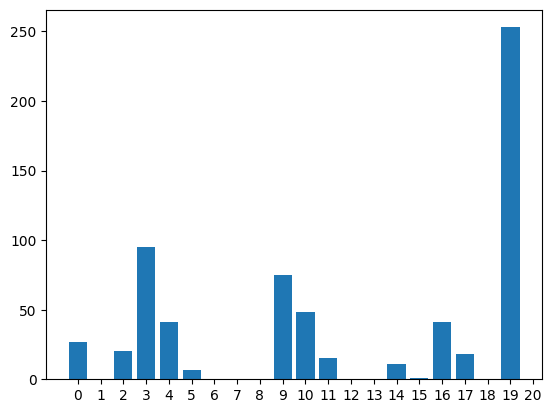

In [207]:
plt.bar(range(20),website_topic_distribution.loc[mydomain,:])
plt.xticks(ticks=range(21))
print('hi')

In [217]:
topic_map = pd.DataFrame()
topic_map['key'] = np.array([i for i in range(20)])
topic_map['topics'] = topic_map['key'].apply(lambda x: lda_topics[x])

In [221]:
topic_map

,key,topics
0,0,"[said, peopl, say, work, like, one, go, time, ..."
1,1,"[music, de, star, bodi, children, place, work,..."
2,2,"[statement, compani, inform, result, financi, ..."
3,3,"[ukrain, russia, russian, china, said, countri..."
4,4,"[gaza, israel, isra, palestinian, hama, said, ..."
5,5,"[googl, appl, use, featur, deal, amazon, user,..."
6,6,"[stock, ratio, averag, trade, share, compani, ..."
7,7,"[stock, compani, compar, earn, indic, share, s..."
8,8,"[stock, share, quarter, compani, own, rate, tr..."
9,9,"[said, polic, court, arrest, investig, case, g..."


In [223]:
df.columns

Index(['title', 'article', 'tags', 'title_clean', 'article_clean', 'text',
       'tags_encoded', 'tfidf_keywords', 'yake_keywords', 'url',
       'published_at', 'lda_topics_n', 'lda_topics', 'lsi_topics',
       'lsi_topics_n', 'nmf_topic_n', 'nmf_topic', 'Domain'],
      dtype='object')

### Topic Trend

0       2023-11-01
1       2023-10-27
2       2023-10-04
3       2023-10-31
4       2023-10-23
           ...    
58351   2023-11-29
58352   2023-11-29
58353   2023-11-29
58354   2023-11-29
58355   2023-11-29
Name: published_at, Length: 58356, dtype: datetime64[ns]

In [234]:
# Assuming 'topics_df' is a DataFrame with columns 'date' and 'topic'
df['published_at_date'] = pd.to_datetime(df['published_at'].str.split(' ').apply(lambda x: x[0].split('.')[0].strip()) )

In [249]:
tmp_df = df[df['lda_topics_n'].isin([4,5,9])]

In [250]:
topics_over_time = tmp_df.groupby([tmp_df['published_at_date'].dt.to_period('D'), 'lda_topics_n']).size().unstack(fill_value=0)

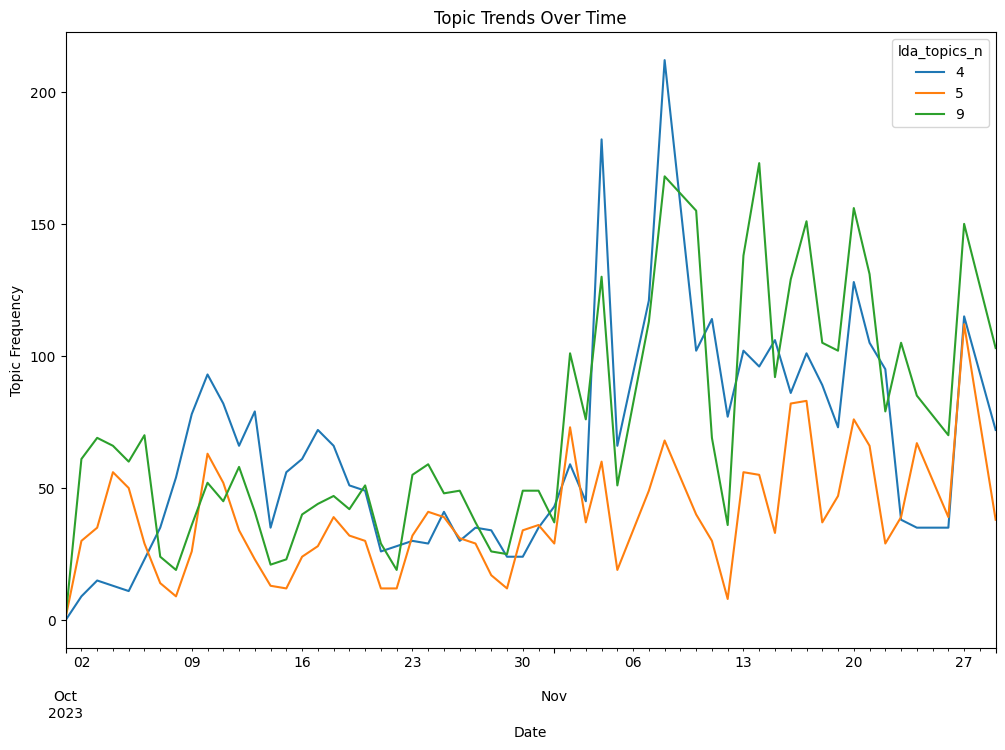

In [251]:

# Plotting
topics_over_time.plot(kind='line', figsize=(12, 8))
plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Topic Frequency')
plt.show()


### 

In [ ]:
# # Group articles by website and topic
# website_topic_distribution = df.groupby(['Domain', 'lda_topics_n']).size().unstack(fill_value=0)

# # Display the DataFrame with the distribution of topics across different websites
# print("Distribution of topics across different websites:")
# print(website_topic_distribution)

### Diversity and Topic Distribution

In [252]:
website_topic_distribution_norm  = website_topic_distribution.div(website_topic_distribution.sum(axis=1), axis=0)

In [253]:
from scipy.stats import entropy

# Calculate the entropy of the topic distribution for each website
website_entropy = website_topic_distribution_norm.apply(lambda x: entropy(x), axis=1)

# Rank websites by diversity (entropy)
diverse_websites = website_entropy.sort_values(ascending=False)

# Print the result
print(diverse_websites)


Domain
ibtimes.com                         2.235031
timesofindia.indiatimes.com         2.167688
cnn.com                             2.165880
indianexpress.com                   2.145828
punchng.com                         2.129032
abcnews.go.com                      2.028385
npr.org                             1.998519
euronews.com                        1.993404
channelnewsasia.com                 1.988855
time.com                            1.959580
businessinsider.com                 1.878836
forbes.com                          1.854333
bbc.co.uk                           1.833223
gizmodo.com                         1.774195
boingboing.net                      1.774100
bbc.com                             1.682504
wired.com                           1.645913
aljazeera.com                       1.601155
readwrite.com                       1.473150
rt.com                              1.471248
allafrica.com                       1.447552
marketscreener.com                  1.407865
cna

In [255]:
df.columns

Index(['title', 'article', 'tags', 'title_clean', 'article_clean', 'text',
       'tags_encoded', 'tfidf_keywords', 'yake_keywords', 'url',
       'published_at', 'lda_topics_n', 'lda_topics', 'lsi_topics',
       'lsi_topics_n', 'nmf_topic_n', 'nmf_topic', 'Domain',
       'published_at_date'],
      dtype='object')

In [257]:
ml_df = df[[ 'title', 'Domain', 'tags','published_at_date',  'tags_encoded', 
    'lda_topics_n', 'lsi_topics_n', 'nmf_topic_n' ,'tfidf_keywords', 'yake_keywords',  ]].copy()

In [259]:
ml_df['tfidf_keywords'] = ml_df['tfidf_keywords'] .apply(lambda x: ', '.join(x))

In [260]:
ml_df['yake_keywords'] = ml_df['yake_keywords'].apply(lambda x: ', '.join(x))

In [263]:
# ml_df.drop('lsi_topics_n',inplace=True, axis=1)

In [265]:
ml_df['url'] =df['url']

In [266]:
ml_df.head(1)

,title,Domain,tags,published_at_date,tags_encoded,lda_topics_n,nmf_topic_n,tfidf_keywords,yake_keywords,url
0,superstar chef yannick alléno brings refined f...,forbes.com,World News,2023-11-01,13,19,15,"london, chef, menu, dine, french, culinari, tr...","london, pavyllon, chef, alléno, yannick, frenc...",https://www.forbes.com/sites/elizabethbrownfie...


In [268]:
ml_df.to_csv('../data/ml_data.csv', index = False)

## To do's left
- Bert Models
- DBScan and Kmeans to get clusters
- Chart of topic distribution in clusters

In [ ]:



# # Encode the tags into numerical values
# label_encoder = LabelEncoder()
# df['tag'] = label_encoder.fit_transform(df['tag'])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['tag'], test_size=0.2, random_state=42)

# # Initialize TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# # Fit and transform the training data
# X_train_tfidf = vectorizer.fit_transform(X_train)

# # Transform the test data
# X_test_tfidf = vectorizer.transform(X_test)

# # Initialize the Logistic Regression model
# model = LogisticRegression(max_iter=1000)

# # Train the model
# model.fit(X_train_tfidf, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Print the classification report
# print(classification_report(y_test, y_pred))

